In [1]:
import numpy as np
from scipy import signal
from scipy.ndimage.filters import gaussian_filter
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
# Load your image
pil_image = Image.open('Ari.jpg')

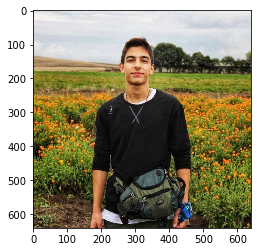

In [3]:
# Show the original picture
plt.imshow(pil_image)

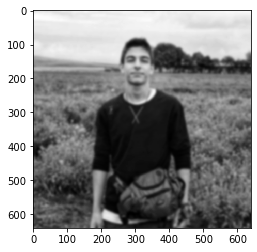

In [4]:
# Grayscale the picture
grayscaled = ImageOps.grayscale(pil_image)

# Gaussian Blur
grayscaled = gaussian_filter(grayscaled, sigma=3)

plt.imshow(grayscaled, cmap='gray')

In [5]:
# Create the vertical and the horizontal filter
filterX = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

filterY = np.array([[1, 2, 1], 
                    [0 ,0, 0], 
                    [-1, -2, -1]])

grayscaled = np.array(grayscaled)

In [6]:
# Convolve with our two filters to create two images showing vertical and horizontal edges
xEdges = signal.convolve2d(grayscaled, filterX, boundary='symm')
yEdges = signal.convolve2d(grayscaled, filterY, boundary='symm')

<Figure size 432x288 with 0 Axes>

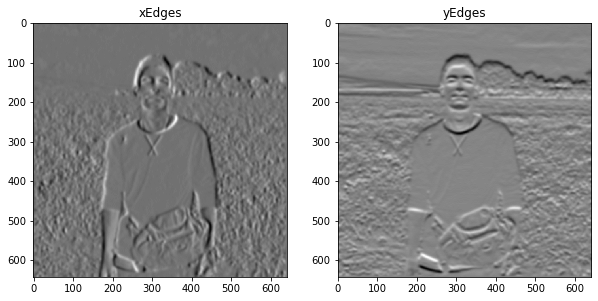

In [7]:
# Show the two images generated above
plt.figure()
f, axarr = plt.subplots(1, 2, figsize=(10, 10))
axarr[0].set_title('xEdges')
axarr[1].set_title('yEdges')

axarr[0].imshow(xEdges, cmap='gray')
axarr[1].imshow(yEdges, cmap='gray')

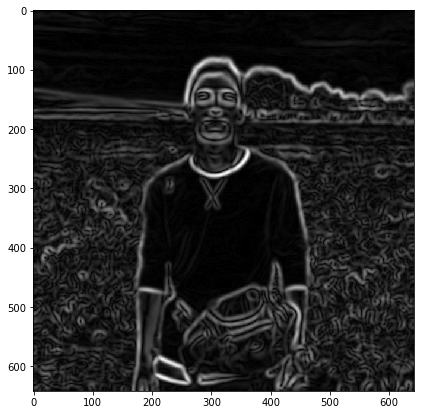

In [8]:
# Combine the two images
comb = np.hypot(xEdges, yEdges)
comb = comb / comb.max() * 255
plt.figure(figsize=(8, 7))
plt.imshow(comb, cmap='gray')

In [9]:
# Wrap-Up the whole thing

def load_and_preprocess(img_address):
    
    # Load your image
    pil_image = Image.open(img_address)
    
    # Show the original picture
    plt.figure()
    plt.title('Original picture')
    plt.imshow(pil_image)
    
    # Grayscale the picture
    grayscaled = ImageOps.grayscale(pil_image)

    # Gaussian Blur
    grayscaled = gaussian_filter(grayscaled, sigma=3)
    
    plt.figure()
    plt.title('Grayscaled blured picture')
    plt.imshow(grayscaled, cmap='gray')
    
    return grayscaled
    
def sobel_edge_detection(image):
    
    # Create vertical and horizontal filters
    filterX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filterY = np.array([[1, 2, 1], [0 ,0, 0], [-1, -2, -1]])
    image = np.array(image)
        
    # Convolving with our two filters to create two images showing vertial edges and horizontal edges
    xEdges = signal.convolve2d(image, filterX, boundary='symm')
    yEdges = signal.convolve2d(image, filterY, boundary='symm')
    
    # Plot the seprate images
    plt.figure()
    f, axarr = plt.subplots(1, 2, figsize=(10, 10))
    axarr[0].set_title('xEdges')
    axarr[1].set_title('yEdges')

    axarr[0].imshow(xEdges, cmap='gray')
    axarr[1].imshow(yEdges, cmap='gray')
    
    # Combine the two images
    comb = np.hypot(xEdges, yEdges)
    comb = comb / comb.max() * 255
    plt.figure(figsize=(10, 10))
    plt.title('Result')
    plt.imshow(comb, cmap='gray')
    
    return comb

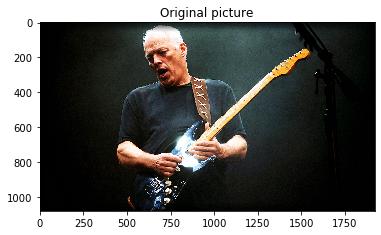

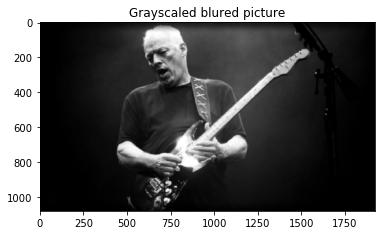

In [10]:
gs = load_and_preprocess('gilmour.jpg')

<Figure size 432x288 with 0 Axes>

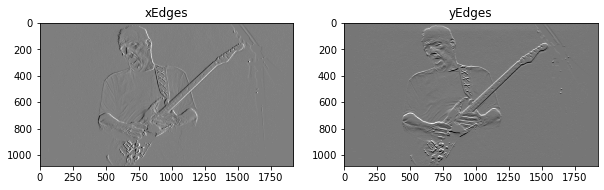

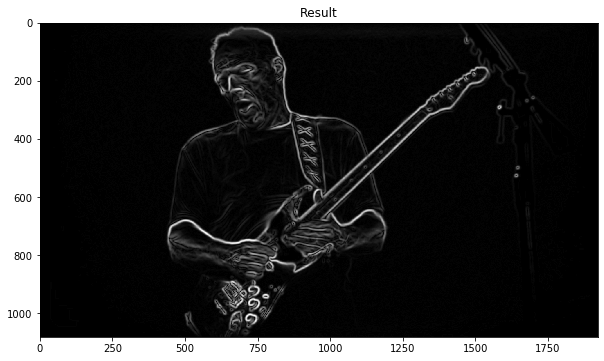

In [11]:
res = sobel_edge_detection(gs)